In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# Read in the file, ‘red wine qualitycsv’ and create a dataframe
df = pd.read_csv('red wine quality dataset.csv')

In [3]:
# Display a sample of data hint: use head()
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# What are the columns?
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# How many samples or observations?
len(df)

1599

In [6]:
# What are the data types?
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# Do any of the datatypes seem incorrect? If so, convert to correct data type. Hint: coerce
# All datatypes appear to be correct

In [7]:
# Is data missing? If so, how will you correct the data?
missing = df.isnull().sum()
print(missing)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Convert all non-numeric columns to numeric columns. Hint: see 11/04 lecture which uses the pandas map method.

<AxesSubplot:>

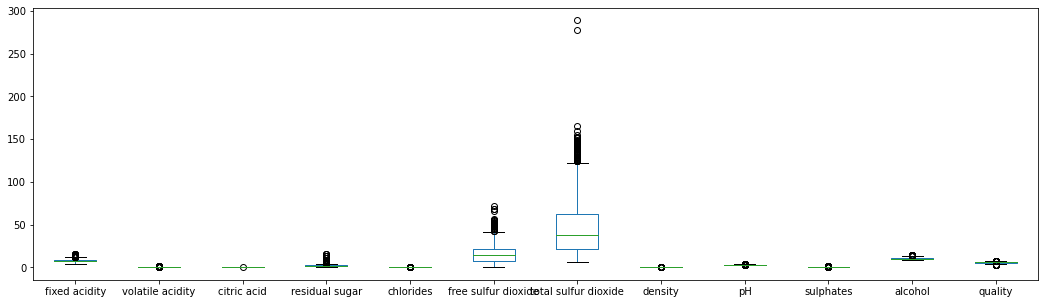

In [8]:
# Create box plots for each feature.
df.plot(kind='box', figsize=(18,5))

<AxesSubplot:xlabel='fixed acidity'>

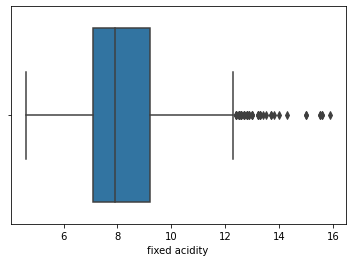

In [10]:
sns.boxplot(x=df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity'>

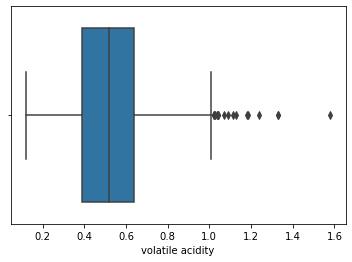

In [11]:
sns.boxplot(x=df['volatile acidity'])

<AxesSubplot:xlabel='citric acid'>

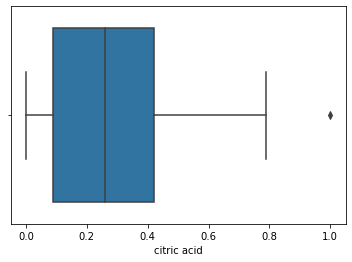

In [12]:
sns.boxplot(x=df['citric acid'])

<AxesSubplot:xlabel='residual sugar'>

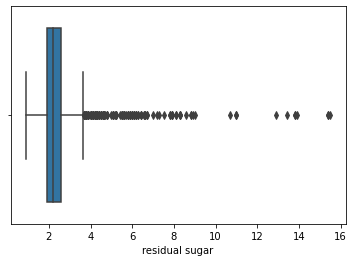

In [13]:
sns.boxplot(x=df['residual sugar'])

<AxesSubplot:xlabel='chlorides'>

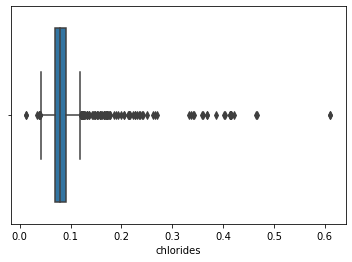

In [14]:
sns.boxplot(x=df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide'>

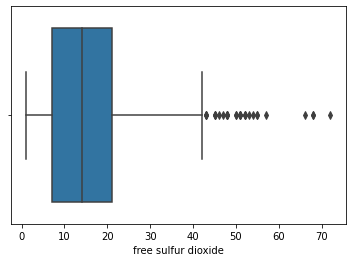

In [15]:
sns.boxplot(x=df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

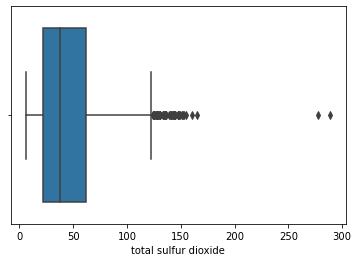

In [16]:
sns.boxplot(x=df['total sulfur dioxide'])

<AxesSubplot:xlabel='density'>

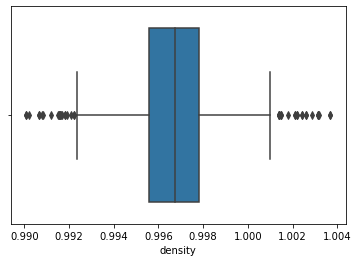

In [17]:
sns.boxplot(x=df['density'])

<AxesSubplot:xlabel='pH'>

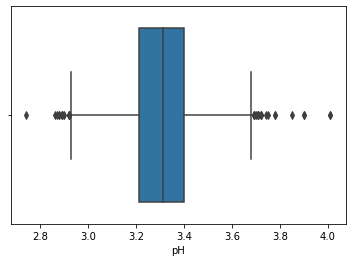

In [18]:
sns.boxplot(x=df['pH'])

<AxesSubplot:xlabel='sulphates'>

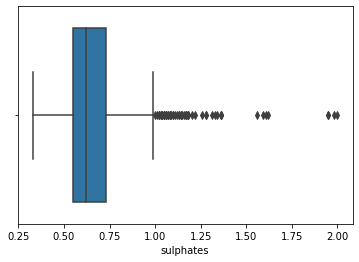

In [19]:
sns.boxplot(x=df['sulphates'])

<AxesSubplot:xlabel='alcohol'>

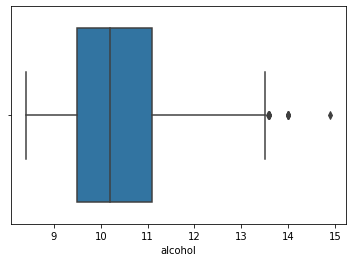

In [20]:
sns.boxplot(x=df['alcohol'])

<AxesSubplot:xlabel='quality'>

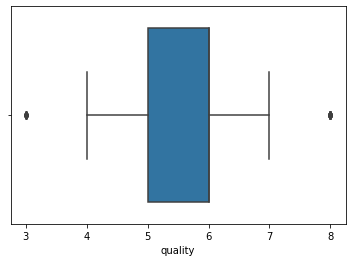

In [21]:
sns.boxplot(x=df['quality'])

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

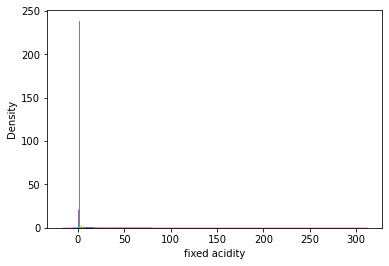

In [25]:
# Create estimate of the distribution using the kernel density estimate for non-binary, numerical features - hint: use sns.kdeplot
column_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for col in column_list : 
    sns.kdeplot(df[col], shade=True)

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

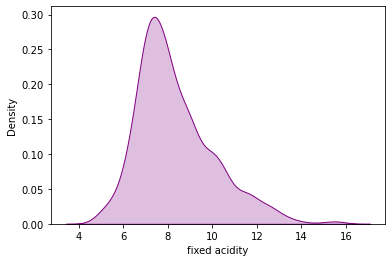

In [27]:
sns.kdeplot(df['fixed acidity'], shade=True, color='purple')

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

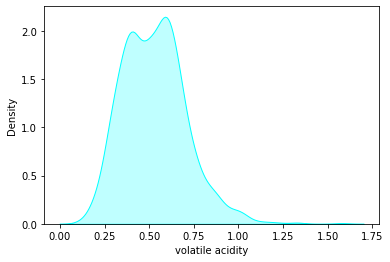

In [28]:
sns.kdeplot(df['volatile acidity'], shade=True, color='cyan')

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

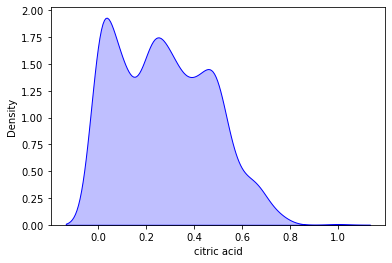

In [29]:
sns.kdeplot(df['citric acid'], shade=True, color='blue')

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

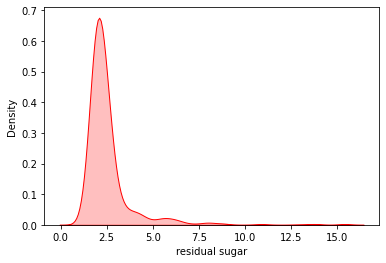

In [30]:
sns.kdeplot(df['residual sugar'], shade=True, color='red')

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

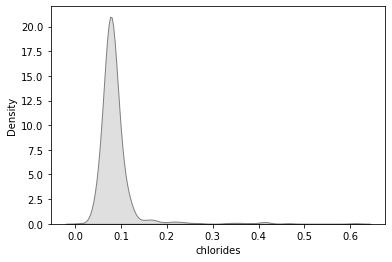

In [31]:
sns.kdeplot(df['chlorides'], shade=True, color='gray')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

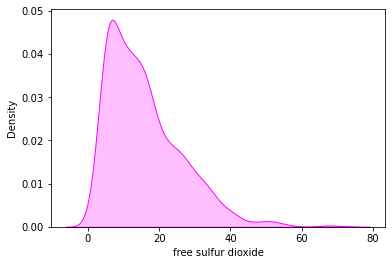

In [32]:
sns.kdeplot(df['free sulfur dioxide'], shade=True, color='magenta')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

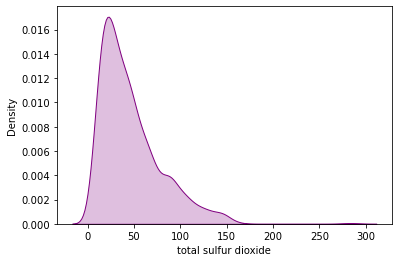

In [33]:
sns.kdeplot(df['total sulfur dioxide'], shade=True, color='purple')

<AxesSubplot:xlabel='density', ylabel='Density'>

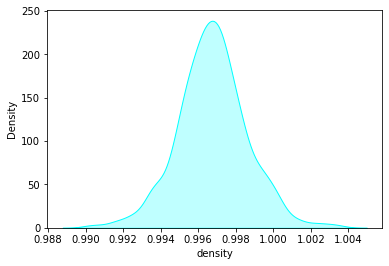

In [34]:
sns.kdeplot(df['density'], shade=True, color='cyan')

<AxesSubplot:xlabel='pH', ylabel='Density'>

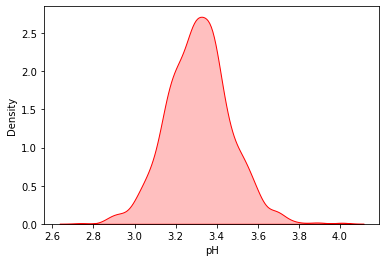

In [35]:
sns.kdeplot(df['pH'], shade=True, color='red')

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

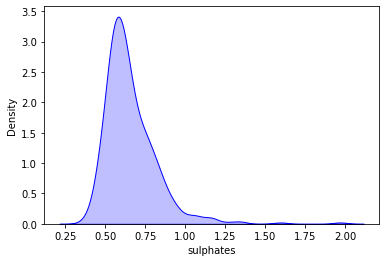

In [36]:
sns.kdeplot(df['sulphates'], shade=True, color='blue')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

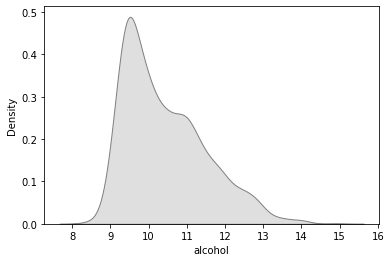

In [37]:
sns.kdeplot(df['alcohol'], shade=True, color='gray')

<AxesSubplot:xlabel='quality', ylabel='Density'>

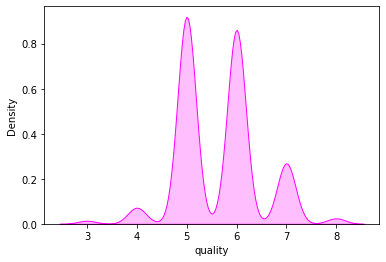

In [38]:
sns.kdeplot(df['quality'], shade=True, color='magenta')

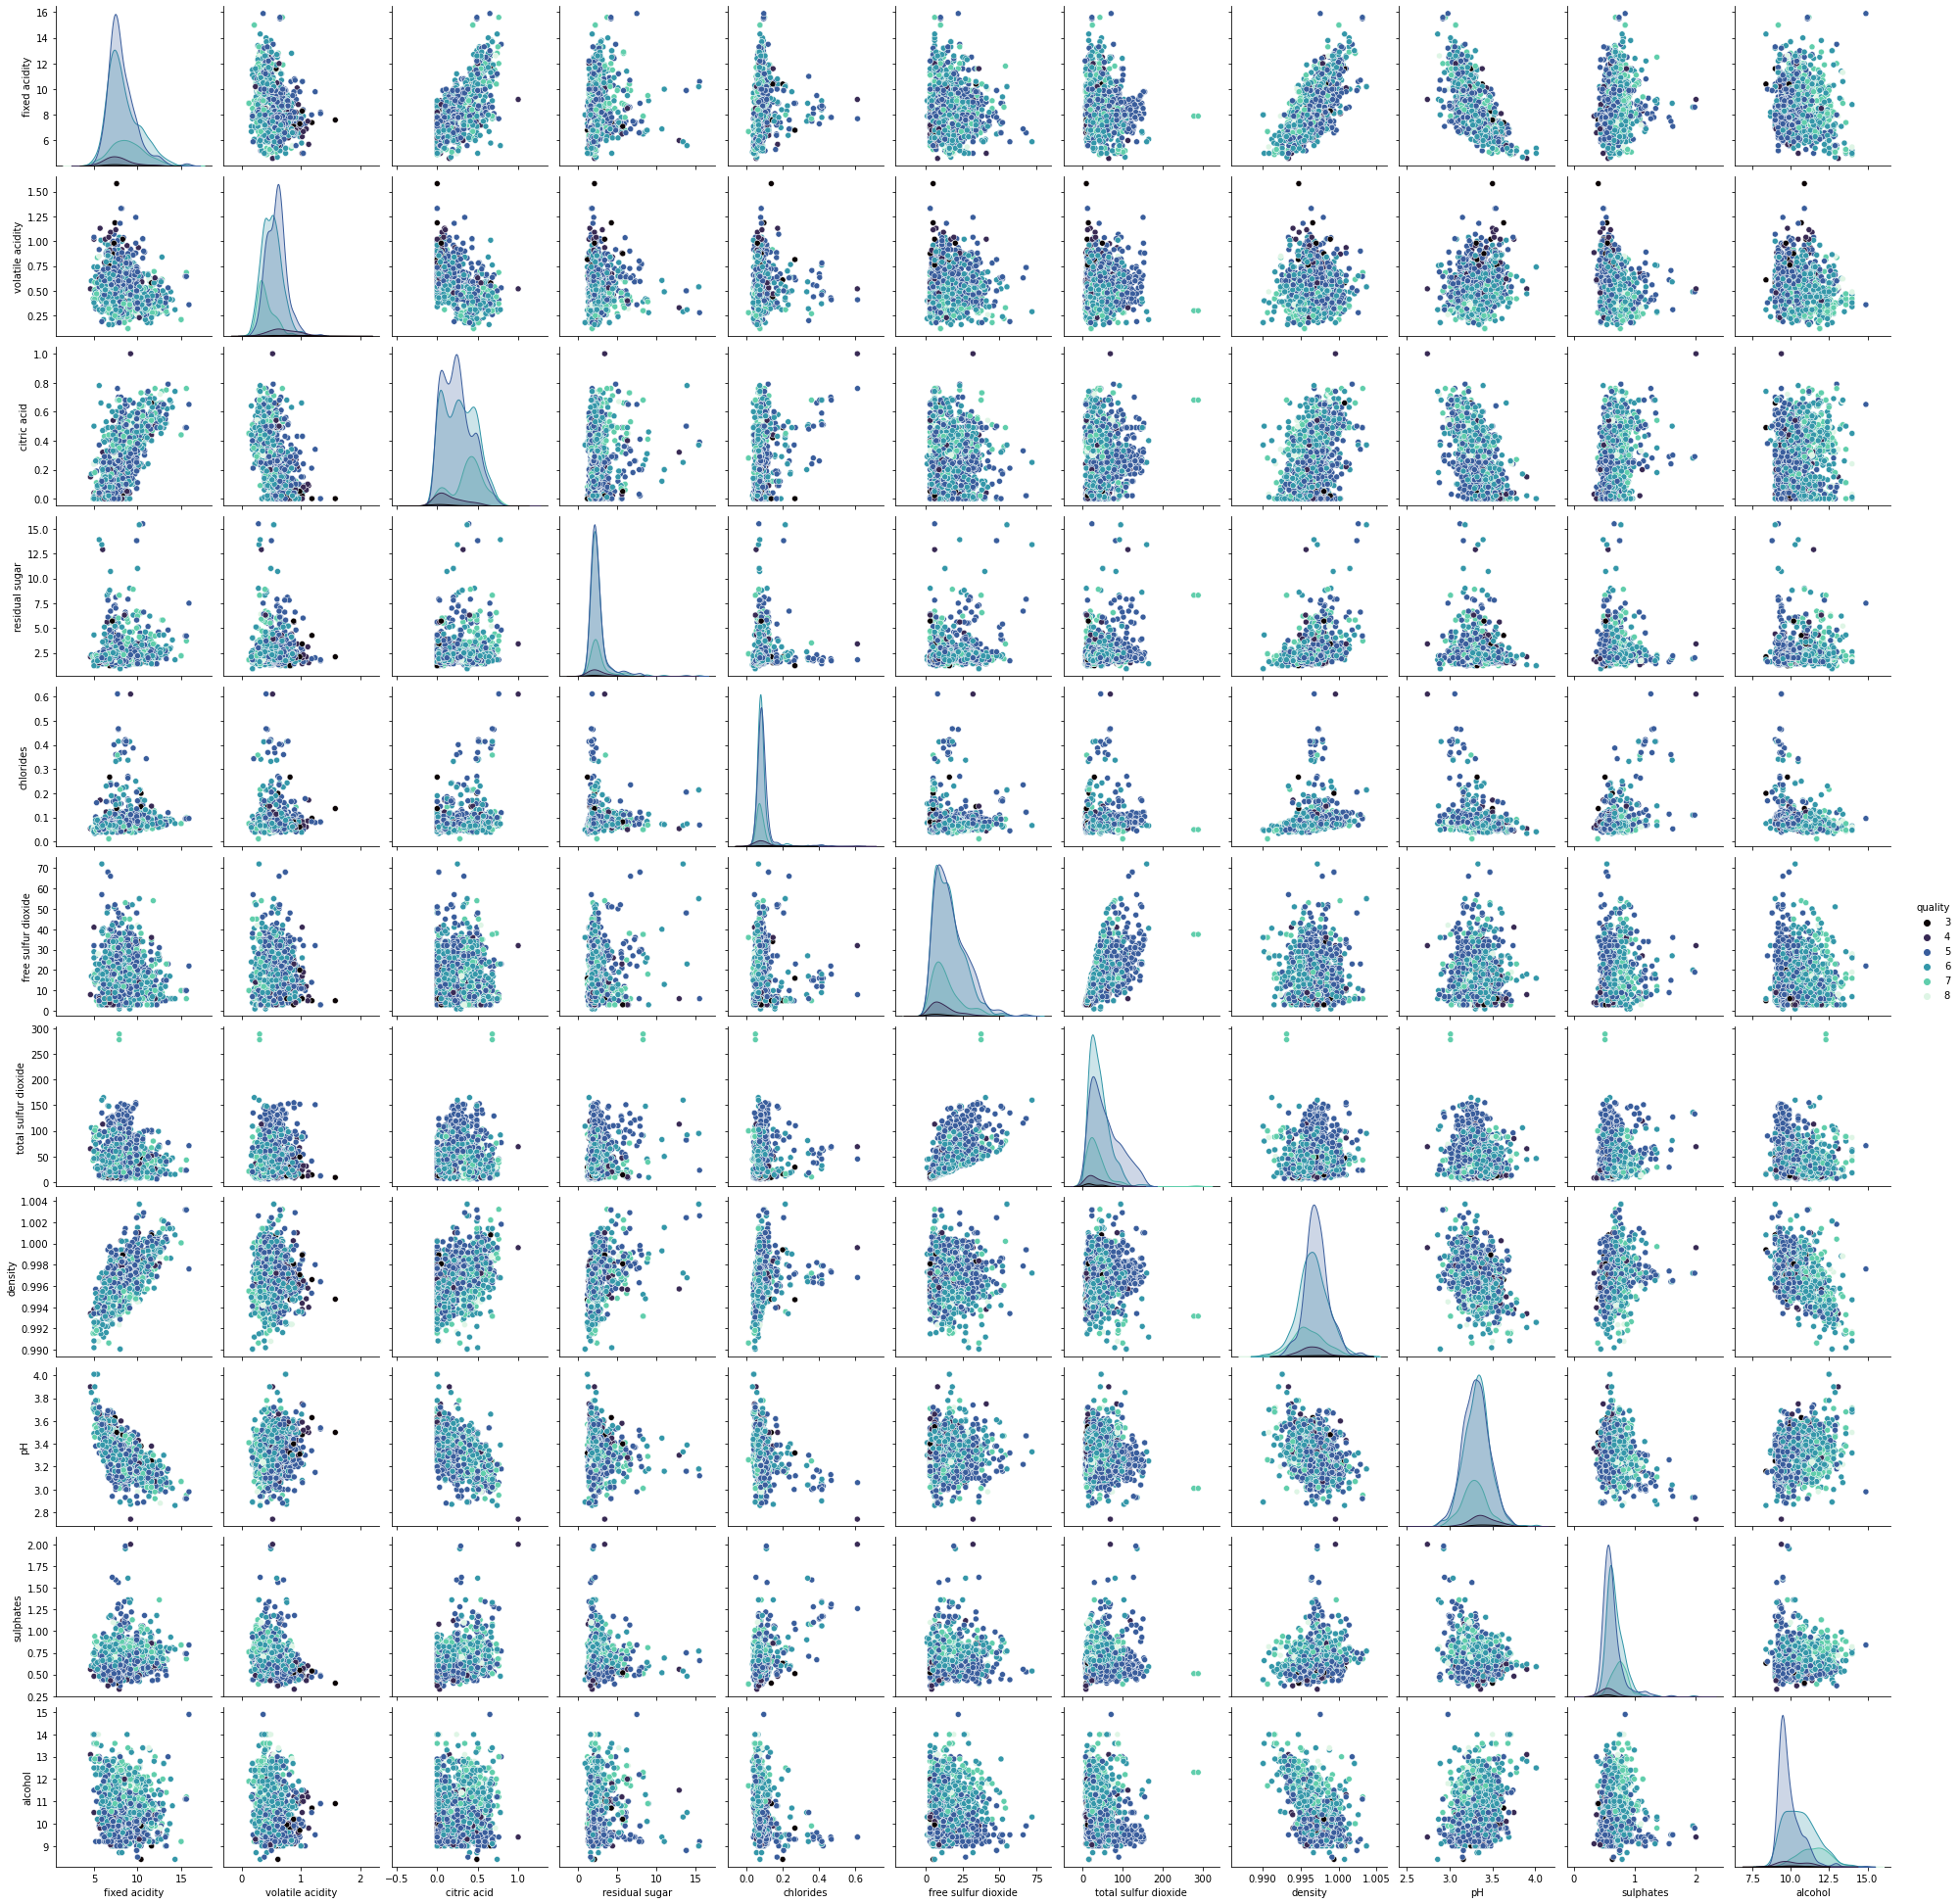

In [40]:
# Make comments on your findings regarding outliers and distributions.
sns.pairplot(df, hue='quality', vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],palette='mako')

In [42]:
# Examine the pair plots for finding possible correlations between features and target.


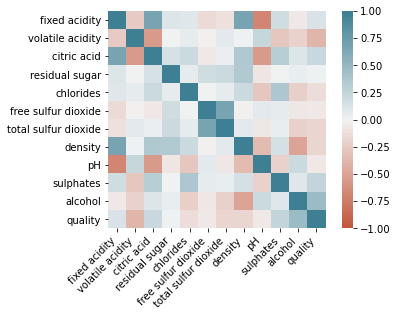

In [43]:
# Create a correlation matrix with heatmap as demonstrated in class.
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# What conclusions can you make after analyzing the data?